In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

cwd = os.getcwd()
print(cwd)
if cwd[-7:] != "Lab_2":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2")
# find and open the flat FITS files that were exposed for 30% saturation and store them all in one list
dark_20s_prefix = "lab2_science_dark_20s.000000"
dark_20s_end = ".DARK.FIT"
dark_20s_data = []
for i in range(7, 17, 1):
    if i < 10:
        filename = dark_20s_prefix + '0' + str(i) + dark_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        dark_20s_data.append(image_data)
    else:
        filename = dark_20s_prefix + str(i) + dark_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        dark_20s_data.append(image_data)

dark_30s_prefix = "lab2_science_dark_30s.0000000"
dark_30s_end = ".DARK.FIT"
dark_30s_data = []
for i in range(0, 10):
    filename = dark_30s_prefix + str(i) + dark_30s_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    dark_30s_data.append(image_data)

/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2


In [17]:
median_dark_20s_values = []
values = [dark_20s_data[x] for x in range(0,len(dark_20s_data))]
# print(values)
median_dark_20s_values.append(np.median(values, axis=0))
median_dark_20s_values = median_dark_20s_values[0]

median_dark_30s_values = []
values = [dark_30s_data[x] for x in range(0,len(dark_30s_data))]
# print(values)
median_dark_30s_values.append(np.median(values, axis=0))
median_dark_30s_values = median_dark_30s_values[0]

In [18]:
flat_red_prefix = "lab2_flat_point_three_red.0000000"
flat_red_end = ".FIT"
flat_red_data = []
for i in range(0, 10):
    filename = flat_red_prefix + str(i) + flat_red_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    flat_red_data.append(image_data)

In [19]:
from scipy import stats

median_flat_red_values = []
values = [flat_red_data[x] for x in range(0,len(flat_red_data))]
# print(values)
median_flat_red_values.append(np.median(values, axis=0))
median_flat_red_values = median_flat_red_values[0]

flatten_flat_red = median_flat_red_values.flatten()
median = np.median(flatten_flat_red)
norm_flat_red = median_flat_red_values / median
flatten_norm_flat_red = norm_flat_red.flatten()

mean = np.mean(flatten_norm_flat_red)
std = stats.tstd(flatten_norm_flat_red)

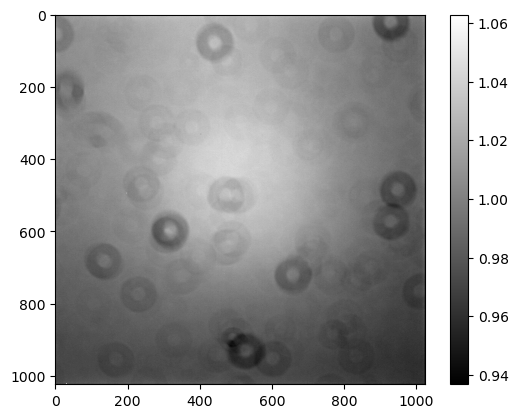

In [20]:
plt.imshow(norm_flat_red, cmap='gray', vmin = mean-3*std, vmax=mean+3*std)
plt.colorbar()

In [21]:
red_20s_prefix = "lab2_science_red_20s.00000"
red_20s_end = ".FIT"
red_20s_data = []
for i in range(0, 248):
    if i == 19 or i == 83 or i == 143 or i == 206:
        continue
    if i < 10:
        filename = red_20s_prefix + "00" + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
    elif i<100:
        filename = red_20s_prefix + "0" + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
    else:
        filename = red_20s_prefix + str(i) + red_20s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_20s_data.append(image_data)
        
red_30s_prefix = "lab2_science_red_30s.00000"
red_30s_end = ".FIT"
red_30s_data = []
for i in range(0, 203):
    if i == 29 or i==69 or i == 73 or i == 109 or i == 123 or i == 165:
        continue
    if i < 10:
        filename = red_30s_prefix + "00" + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)
    elif i<100:
        filename = red_30s_prefix + "0" + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)
    else:
        filename = red_30s_prefix + str(i) + red_30s_end
        list = fits.open('images/'+filename)
        image_data = list[0].data
        red_30s_data.append(image_data)

In [24]:
for i in range(0, len(red_20s_data)):
    red_20s_data[i] = (red_20s_data[i]-median_dark_20s_values) / median_flat_red_values
for i in range(0, len(red_30s_data)):
    red_30s_data[i] = (red_30s_data[i]-median_dark_30s_values) / median_flat_red_values

In [32]:
import os

if cwd[-21:] != "calibrated_fits_files":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_2/calibrated_fits_files")

if os.path.exists("calibrated_fits_files/calib_red_20s.000.FIT") == False:
    for i in range(0, len(red_20s_data)):
        red_20s_prefix = "calib_red_20s."
        red_20s_suffix = ".FIT"
        if i < 10:
            hdu = fits.PrimaryHDU(red_20s_data[i])
            filename = red_20s_prefix + "00" + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)
        elif i<100:
            hdu = fits.PrimaryHDU(red_20s_data[i])
            filename = red_20s_prefix + "0" + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)
        else:
            hdu = fits.PrimaryHDU(red_20s_data[i])
            filename = red_20s_prefix + str(i) + red_20s_suffix
            hdu.writeto(filename, overwrite=True)
